In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gc

In [4]:
tweets_df = pd.read_csv('twitter - Copy.csv')

In [5]:
tweets_df

,id,label,tweet
0,1.0,0,@user when a father is dysfunctional and is s...
1,7528.0,0,appletstag #selfie #me #smile #girl #love #h...
2,7529.0,0,#saysomething bull up: you will dominate you...
3,7530.0,0,#abstractaist polar bear climb racing: angry...
4,7531.0,0,@user @user @user @user @user this whole hrc c...
...,...,...,...
23457,30398.0,1,let me tell you a story about and #videogames...
23458,30403.0,1,.@user @user ð¹@user so please stop go away ...
23459,30426.0,1,@user #allahsoil not all muslims are islamic e...
23460,30445.0,1,billionaire chair of trump says he hopes obama...


In [6]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23462 entries, 0 to 23461
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      23461 non-null  float64
 1   label   23462 non-null  int64  
 2   tweet   23462 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 550.0+ KB


In [7]:
tweets_df.describe()

,id,label
count,23461.000000,23462.000000
mean,18652.570862,0.090359
std,6931.970426,0.286701
min,1.000000,0.000000
25%,12866.000000,0.000000
50%,18731.000000,0.000000
75%,24596.000000,0.000000
max,30462.000000,1.000000


In [8]:
tweets_df = tweets_df.drop(['id'], axis=1)

In [9]:
tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,appletstag #selfie #me #smile #girl #love #h...
2,0,#saysomething bull up: you will dominate you...
3,0,#abstractaist polar bear climb racing: angry...
4,0,@user @user @user @user @user this whole hrc c...
...,...,...
23457,1,let me tell you a story about and #videogames...
23458,1,.@user @user ð¹@user so please stop go away ...
23459,1,@user #allahsoil not all muslims are islamic e...
23460,1,billionaire chair of trump says he hopes obama...


<Axes: >

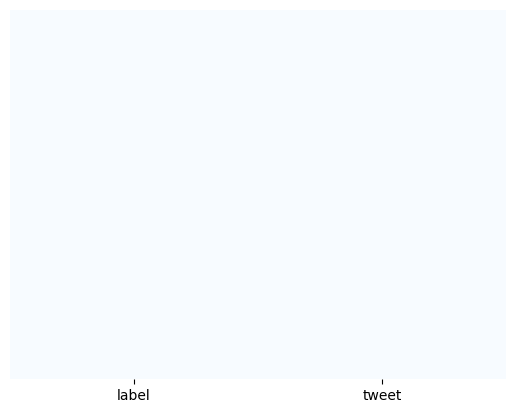

In [ ]:
sns.heatmap(tweets_df.isnull(), yticklabels=False, cbar = False, cmap = 'Blues')

In [12]:
gc.collect()

236

'This code generates histograms for all numerical columns in tweets_df, helping visualize their\ndistribution. The bins=30 parameter divides data into 30 intervals, while figsize=(15,5) ensures\nbetter readability. The red color makes the bars visually distinct, making it easier to analyze trends and outliers.'

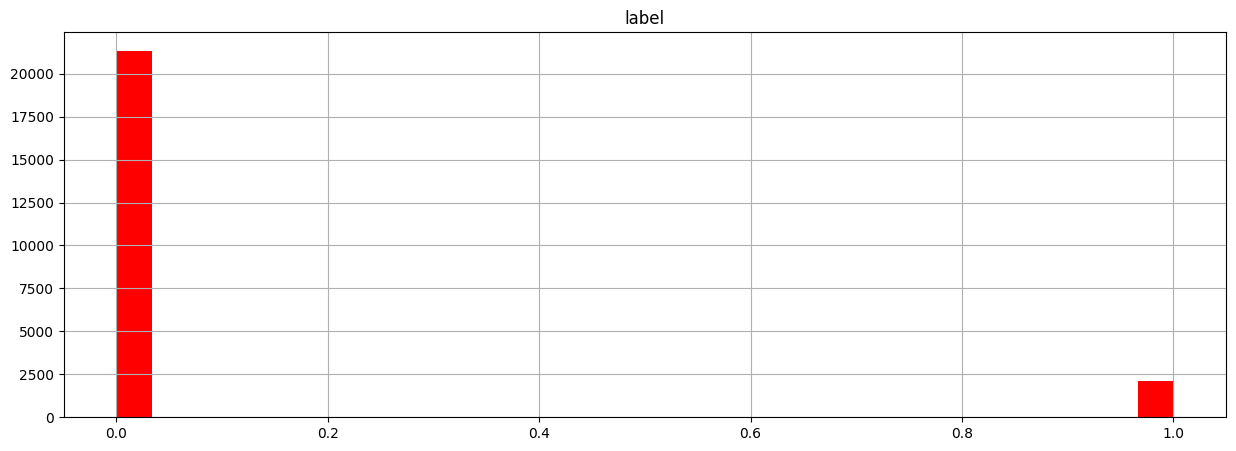

In [ ]:

tweets_df.hist(figsize=(15, 5), bins = 30, color='red')

<Axes: ylabel='count'>

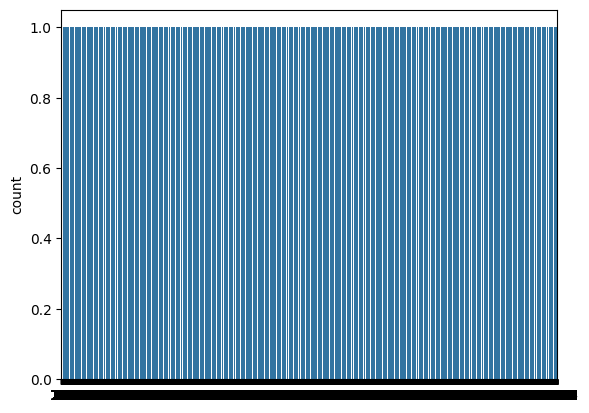

In [ ]:
sns.countplot(tweets_df['label'], label="Count")

In [14]:
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [15]:
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,appletstag #selfie #me #smile #girl #love #h...,89
2,0,#saysomething bull up: you will dominate you...,109
3,0,#abstractaist polar bear climb racing: angry...,107
4,0,@user @user @user @user @user this whole hrc c...,92
...,...,...,...
23457,1,let me tell you a story about and #videogames...,103
23458,1,.@user @user ð¹@user so please stop go away ...,99
23459,1,@user #allahsoil not all muslims are islamic e...,94
23460,1,billionaire chair of trump says he hopes obama...,132


In [16]:
tweets_df.describe()

,label,length
count,23462.000000,23462.000000
mean,0.090359,84.636135
std,0.286701,29.569363
min,0.000000,11.000000
25%,0.000000,62.000000
50%,0.000000,88.000000
75%,0.000000,107.000000
max,1.000000,274.000000


In [ ]:
tweets_df[tweets_df['length'] == 11]['tweet']

,tweet
16426,i love you


In [ ]:
tweets_df[tweets_df['length'] == 11]['tweet'].iloc[0] 

'i love you '

In [ ]:
tweets_df[tweets_df['length'] == 84]['tweet'] 

,tweet
111,saturday morning #sky ... #sunrise #goodmornin...
171,@user wednesday or thursday ? any day will be...
254,@user evergreen college police can't park prop...
381,free pdf download of my sho story the sad thin...
392,#things making me #blacksabbath #berlin #th...
...,...
22519,don't miss this: miriam herschlag's blog: haim...
22520,"""racism in muslim societies"" by dr. eren tasar..."
22681,@user commercial showing inter-racial couple a...
23077,the latest the african american turmoil! than...


In [20]:
tweets_df[tweets_df['length'] == 84]['tweet'].iloc[0]

'saturday morning #sky ... #sunrise #goodmorning #instavideo #love #bluesky   #smile '

<Axes: ylabel='Frequency'>

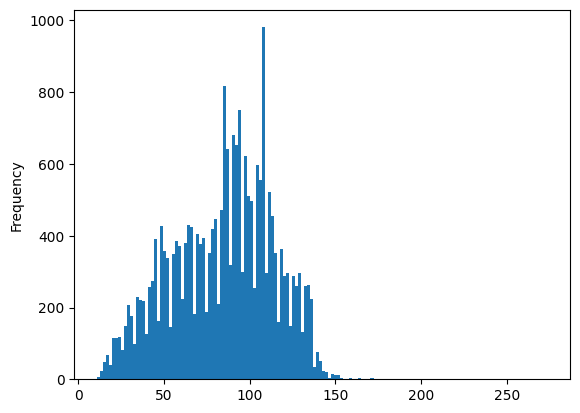

In [21]:
tweets_df['length'].plot(bins=150, kind='hist')

In [22]:
gc.collect()

5403

**PREPARING DATA FOR WORDCLOUDS**

In [23]:
positive = tweets_df[tweets_df['label'] == 0]
negative = tweets_df[tweets_df['label'] == 1]

In [24]:
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,appletstag #selfie #me #smile #girl #love #h...,89
2,0,#saysomething bull up: you will dominate you...,109
3,0,#abstractaist polar bear climb racing: angry...,107
4,0,@user @user @user @user @user this whole hrc c...,92
...,...,...,...
21337,0,simply the best !!!,20
21338,0,@user real life living persons actually desir...,121
21339,0,comfy shoes #shoes#shoeporn#sneakers#sneakerh...,83
21340,0,huge black dicks porn pussy,31


In [25]:
negative

,label,tweet,length
21342,1,@user #cnn calls #michigan middle school 'buil...,74
21343,1,no comment! in #australia #opkillingbay #se...,101
21344,1,retweet if you agree!,22
21345,1,@user @user lumpy says i am a . prove it lumpy.,47
21346,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
23457,1,let me tell you a story about and #videogames...,103
23458,1,.@user @user ð¹@user so please stop go away ...,99
23459,1,@user #allahsoil not all muslims are islamic e...,94
23460,1,billionaire chair of trump says he hopes obama...,132


**GENERATING WORDCLOUDS**

In [26]:
possentense = tweets_df['tweet'].tolist()
len(possentense)

23462

In [27]:
posstring = ' '.join(possentense)

In [28]:
posstring

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run appletstag #selfie #me #smile #girl   #love #hair #selca #summer #followme #instagoodâ\x80¦  #saysomething   bull up: you will dominate your bull and you will direct it whatever you want it to do. when  #abstractaist   polar bear climb racing: angry polar bear climb racing, the polar bear living in cold plac  @user @user @user @user @user this whole hrc candidacy is a joke. she lives above the law.   when your friend says "you remind me of a rock in my garden..." #funny #smile    i am imaginative. #i_am #positive #affirmation        father\'s day. i came close not close enough.# bowling # preston # southpo  ð\x9f\x8c\x9f...wishing @user a very  bihday #hbd  #bihday ð\x9f\x98\x99 ð\x9f\x98\x99 ð\x9f\x98\x99 ð\x9f\x8c\x9f  #aboutlastnightâ\x80¦  19 days to go!!! #florida #disney #holiday    bitch i wish my bestfriend would come back on some funny shit cause i\'m in hs   a dream comes t

In [29]:
negsentense = negative['tweet'].tolist()
len(negsentense)

2120

In [30]:
negstring = ' '.join(negsentense)
negstring

'@user #cnn calls #michigan middle school \'build the wall\' chant \'\' #tcot   no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins retweet if you agree!  @user @user lumpy says i am a . prove it lumpy. it\'s unbelievable that in the 21st century we\'d need something like this. again. #neverump  #xenophobia  @user lets fight against  #love #peace  ð\x9f\x98©the white establishment can\'t have blk folx running around loving themselves and promoting our greatness   @user hey, white people: you can call people \'white\' by @user  #race  #identity #medâ\x80¦ how the #altright uses  &amp; insecurity to lure men into #whitesupremacy     @user i\'m not interested in a #linguistics that doesn\'t address #race &amp; . racism is about #power. #raciolinguistics bringsâ\x80¦ @user why not @user mocked obama for being black.  @user @user @user @user #brexit #people aren\'t protesting #trump because a #republican won-they do so because trump has fuhe

In [31]:
from wordcloud import WordCloud

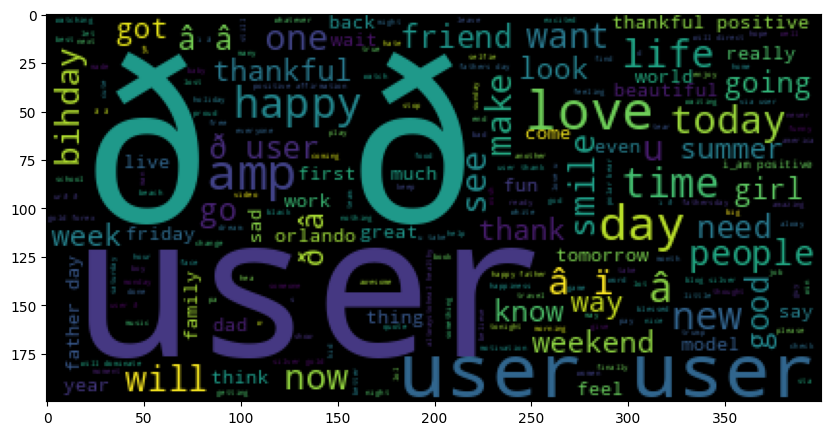

In [32]:
plt.figure(figsize=(10, 10))
plt.imshow(WordCloud().generate(posstring))

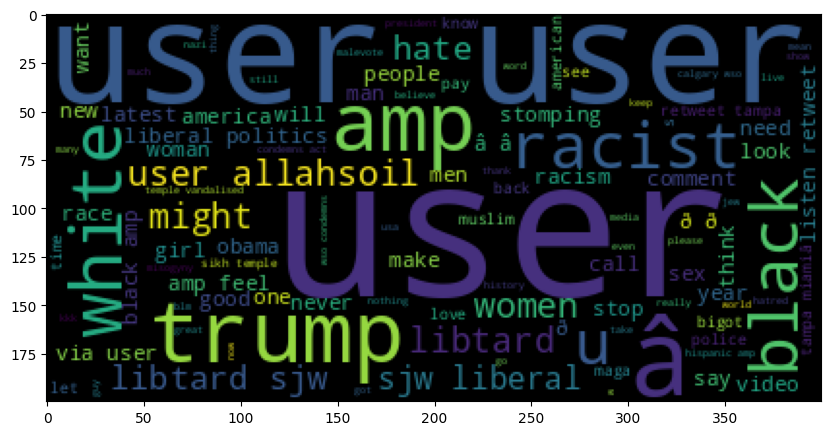

In [33]:
plt.figure(figsize=(10, 10))
plt.imshow(WordCloud().generate(negstring))

**DATA CLEANING - REMOVING PUNCTUATIONS FROM DATA**

This process helps in reducing noise and dimensionality, allowing the model to learn more effectively from the relevant features.

In [34]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
gc.collect()

260

**DATA CLEANING - REMOVING STOP WORDS FROM DATA**

This process helps in reducing noise and dimensionality, allowing the model to learn more effectively from the relevant features.

In [36]:
import nltk

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
from nltk.corpus import stopwords

In [ ]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

**PERFORM** **COUNT VECTORIZATION (TOKENIZATION)**

Tokenization is the process of breaking down text into smaller units, typically words or phrases, which are called tokens. This is a crucial step in natural language processing (NLP) because it allows algorithms to analyze and understand the structure of the text.

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

**CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION**

In [41]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [42]:
gc.collect()

236

In [43]:
# Let's test the newly added function
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [44]:
print(tweets_df['tweet'][5]) # show the original version

when your friend says "you remind me of a rock in my garden..." #funny #smile   


In [45]:
print(tweets_df_clean[5]) # show the cleaned up version

['friend', 'says', 'remind', 'rock', 'garden', 'funny', 'smile']


In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [48]:
gc.collect()

30

In [49]:
print(vectorizer.get_feature_names_out())

['0' '0000001' '00027' ... 'ó¾®\x9fð\x9f\x8f¾ó¾\xad»' 'ó¾°\x80'
 'ó¾°\x80ó¾\x8d\x92ó¾\x86\x9fó¾\x86¤ó¾®\x9fó¾\x92ºó¾®\x9eó¾\x94\x9bó¾\x94\x83ó¾\x95\x86']


In [50]:
print(tweets_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [51]:

tweets_countvectorizer.shape

(23462, 38346)

In [52]:
X = pd.DataFrame(tweets_countvectorizer.toarray())

In [53]:
X

,0,1,2,3,4,5,6,7,8,9,...,38336,38337,38338,38339,38340,38341,38342,38343,38344,38345
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
y = tweets_df['label']

In [55]:
y

,label
0,0
1,0
2,0
3,0
4,0
...,...
23457,1
23458,1
23459,1
23460,1


**TRAINING NAIVE BAYES BASED MODEL**

In [56]:
X.shape

(23462, 38346)

In [57]:
y.shape

(23462,)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # 20% testing; 80% training

In [61]:

gc.collect()

0

**TRAINING THE NAIVE BAYES MODEL**

In [62]:
from sklearn.naive_bayes import MultinomialNB
NB_Classifier = MultinomialNB()
NB_Classifier.fit(X_train, y_train)

MultinomialNB()

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

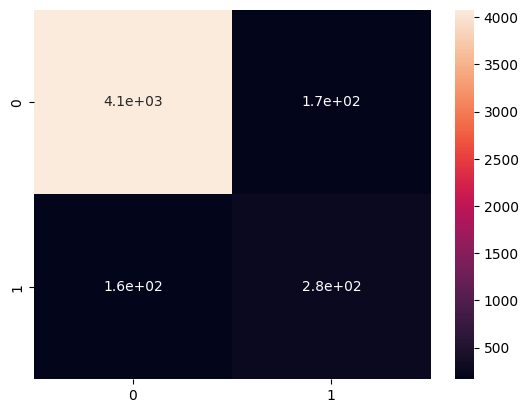

In [64]:
# Predicting the Test set results
y_predict_test = NB_Classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [65]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4249
           1       0.62      0.63      0.62       444

    accuracy                           0.93      4693
   macro avg       0.79      0.79      0.79      4693
weighted avg       0.93      0.93      0.93      4693



Accuracy: The overall correctness of the model, calculated as the ratio of correctly predicted instances to the total instances.
Precision: The ratio of true positive predictions to the total predicted positives, indicating how many of the predicted positive cases were actually positive.
Recall (Sensitivity): The ratio of true positive predictions to the total actual positives, showing how well the model identifies positive cases.
F1 Score: The harmonic mean of precision and recall, providing a balance between the two metrics.


## ***DONE***

In [66]:
import joblib

In [67]:
joblib.dump(NB_Classifier, 'NB_Classifier.pkl')

['NB_Classifier.pkl']

In [68]:
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']